# Analyse temporelle d'un alt-coin: le BTC coin

On distingue trois grands axes de travail sur les séries temporelles : la visualisation, l'analyse et la prédiction. Dans cette partie nous allons nous focaliser sur l'analyse des séries.
Commencons par importer les packages nécessaires à notre analyse de séries temporelles. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Nous devons télécharger le dataframe contenant les différents bitcoins observés sur la période d 2013 jusqu'à decembre 2019.

In [3]:
#df = pd.read_csv('C:/Users/monle/Downloads/crypto_merged.csv')
df = pd.read_csv('C:/Users/monle/AltCoins/data_sources/df_global_final.csv', sep = ',', header=0, parse_dates=[0], index_col = 0, squeeze=True)
df.head()

#df_global_final.csv

,GOLD_USD_AM,GOLD_USD_PM,GOLD_GBP_AM,GOLD_GBP_PM,GOLD_EUR_AM,GOLD_EUR_PM,BTC_Open,BTC_High,BTC_Low,BTC_Close,...,COCOA_Low,COCOA_Close,COCOA_Volume,IBM_Open,IBM_High,IBM_Low,IBM_Close,IBM_Volume,Day_Cos,Day_Sin
GOLD_Time,,,,,,,,,,,,,,,,,,,,,
2019-11-30,1456.0,1460.0,1129.55,1131.32,1323.24,1327.42,7764,7836,7515,7569,...,2512.405,2512.405,0.0,134.45,134.45,134.45,134.45,0.0,0.623490,-0.781831
2019-11-29,1456.0,1460.0,1129.55,1131.32,1323.24,1327.42,7466,7781,7460,7761,...,2512.405,2512.405,0.0,133.59,134.51,133.04,134.45,773921.0,-0.222521,-0.974928
2019-11-28,1458.0,1455.0,1127.27,1127.35,1323.60,1321.84,7536,7730,7454,7463,...,2512.405,2512.405,0.0,133.76,133.76,133.76,133.76,0.0,-0.900969,-0.433884
2019-11-27,1459.8,1454.0,1134.12,1129.74,1326.23,1322.30,7220,7619,6974,7531,...,2512.405,2512.405,0.0,135.28,135.70,133.63,133.76,0.0,-0.900969,0.433884
2019-11-26,1458.0,1455.0,1133.76,1131.86,1322.96,1321.11,7145,7320,7098,7218,...,2512.405,2512.405,0.0,136.01,136.15,134.77,135.03,0.0,-0.222521,0.974928


In [4]:
#df = df.set_index('GOLD_Time')
#df.columns
#df.shape

## I- Visualisation de la distribution de BTC avec des boites à moustaches

C:\Users\monle\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


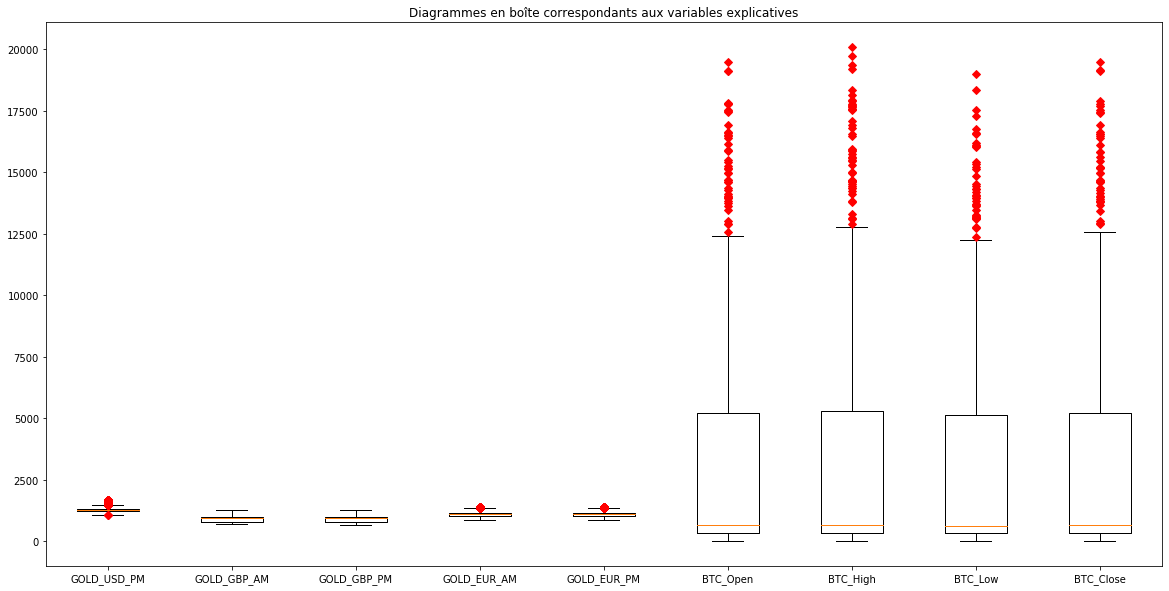

In [4]:
# Diagramme en boîte (boxplot) de tous les variables explicatives
cv_data = df.iloc[:,1:10]
# Récupération des indices des colonnes 
ls_features = list(cv_data.keys())

# Diagramme en boîte (boxplot) de toutes les variables explicatives
plt.figure(figsize=(20, 10))
plt.title('Diagrammes en boîte correspondants aux variables explicatives')
plt.boxplot(cv_data.as_matrix(), 0, 'rD', labels = ls_features)
# ou df.boxplot(column=list(df.columns))

plt.show()


D'après ces boites à moustaches, on voit bien que le cour de l'or est plus stable que celui du BTC, qui peut avoir des fluctuations très forte ponctuellement, ce qui représente des valeurs aberrantes en traitement des données.

## |I - Décomposition additive de BTC_coin 

Nous considérons ici le BTC_close comme variable à étudier de près. Nous allons chercher s'il y a une certaine périodicité dans l'évolution de cet alt-coin (annuelle, mentuelle, ou hebdomadaire)

In [5]:
df1 = df.fillna(0)

C:\Users\monle\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


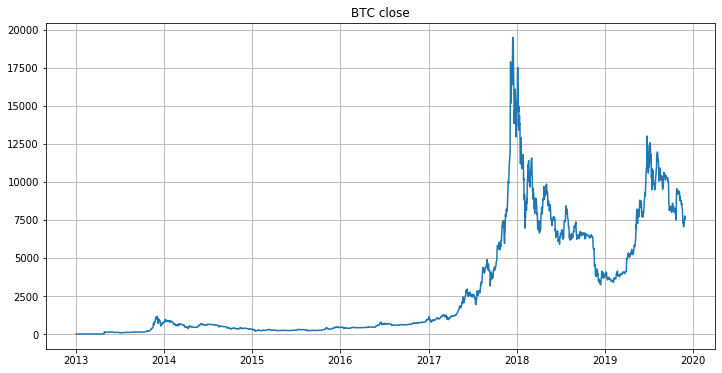

In [6]:
plt.figure(figsize = (12,6))
plt.plot(df1.BTC_Close)
plt.title('BTC close')
plt.grid(True)
plt.show();


In [11]:
#print(df1.index)
bitcoins = ['GOLD_EUR_PM', 'GOLD_USD_PM', 'BTC_Volume', 'BTC_Market_Cap', 'BTC_Close','ETH_Close', 'ETH_Volume',
       'ETH_Market_Cap', 'BNB_Close', 'BNB_Volume']

DatetimeIndex(['2019-12-31', '2019-12-30', '2019-12-29', '2019-12-28',
               '2019-12-27', '2019-12-26', '2019-12-25', '2019-12-24',
               '2019-12-23', '2019-12-22',
               ...
               '2013-01-11', '2013-01-10', '2013-01-09', '2013-01-08',
               '2013-01-07', '2013-01-06', '2013-01-05', '2013-01-04',
               '2013-01-03', '2013-01-02'],
              dtype='datetime64[ns]', name='GOLD_Time', length=2561, freq=None)


In [7]:
df1.BTC_Close.isnull().sum(),df.BTC_Close.isnull().sum() 

(0, 0)

### 1 - A la recherche d'une périodicité mensuelle

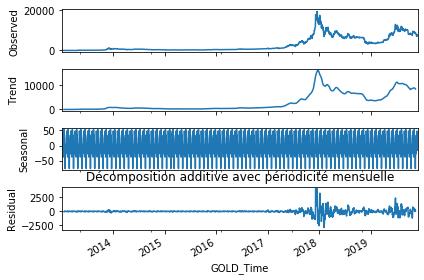

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

#FREQUENCE MENSUEL
decomp = seasonal_decompose(df1.BTC_Close, freq = 30)

decomp.plot()
plt.title('Décomposition additive avec périodicité mensuelle')
plt.show()



### 2- A la recherche d'une périodicité annuelle

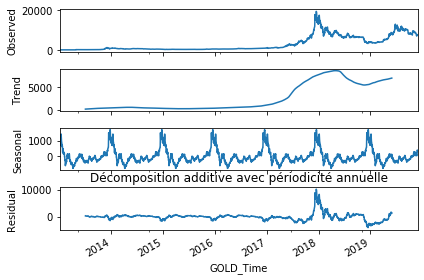

In [9]:
decomp = seasonal_decompose(df1.BTC_Close, freq = 365)

decomp.plot()
plt.title('Décomposition additive avec périodicité annuelle')
plt.show();



### 3 - A la recherche d'une périodicité hebdomadaire

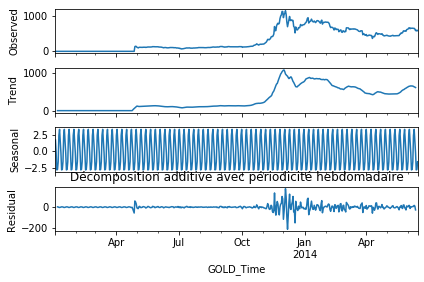

In [10]:
decomp = seasonal_decompose(df1.BTC_Close[2000:], freq = 7)

decomp.plot()
plt.title('Décomposition additive avec périodicité hebdomadaire')
plt.show();



## III - Décomposition multiplicative

Avant de passer à la décomposiotion multiplicative, il faudrait enlever tous les zeros afin de pouvoir applique la fonction  logarithmique dessus.

In [12]:
BTC_n = df.BTC_Close[df["BTC_Close"] != 0]


### 1 - Modèle multiplicatif avec une périodicité annuelle

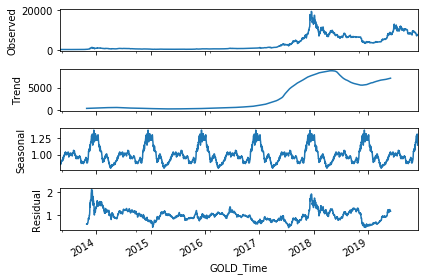

In [13]:
res = seasonal_decompose(BTC_n, model = 'multiplicative', freq = 365)
res.plot()
plt.show()

### 2- Modèle multiplicatif avec une périodicité mensuelle 

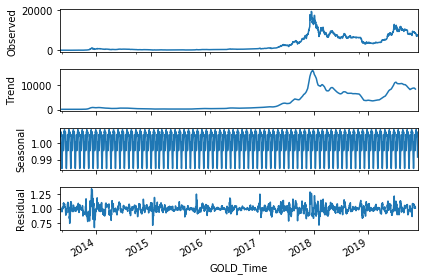

In [14]:
res = seasonal_decompose(BTC_n, model = 'multiplicative', freq = 30)
res.plot()
plt.show()

### 3 - Modèle multiplicatif avec périodicité hebdomadaire 

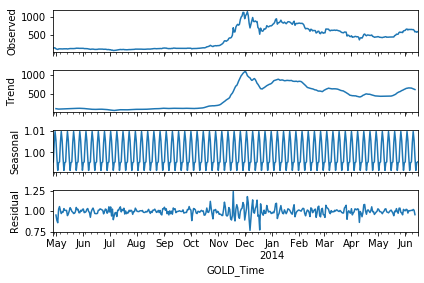

In [16]:
res = seasonal_decompose(BTC_n[2000:], model = 'multiplicative', freq = 7)
res.plot()
plt.show()

Entre les trois modèle, le dernier présente le meilleur résidu. C'est comme pour dire que dans l'évolution du BTC, il y a un léger aspect de périodicité hebdomadaire, en dehors des périodes de grandes variations.

Au vu de la forme du résidu la décomposition est loin d'être parfaite. Pour obtenir de meilleurs résultats, l'utilisation d'algorithmes plus avancés est nécessaire. Nous allons nous intéresser au logarithme de cette série, afin de nous ramener à un modèle additif. Cela nous permettra ensuite de la désaisonnaliser à l'aide d'une régression linéaire.

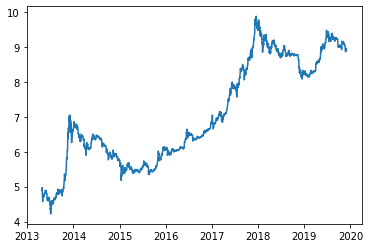

In [17]:
BTC_log = np.log(BTC_n)
plt.plot(BTC_log)